# Writing and Reading Data in Python
# HDF5 Files

HDF5 is a popular file format for storing and managing large amounts of scientific data. In Python, you can use the h5py library to read and write HDF5 files. Here's an example of how to write an array of data to an HDF5 file:

In [2]:
import h5py

data = [1, 2, 3, 4, 5]

with h5py.File('data.h5', 'w') as f:
    dset = f.create_dataset('my_data', data=data)


This creates a new HDF5 file called data.h5 and stores the data array as a dataset called my_data. To read the data back from the file, you can use:

In [3]:
import h5py

with h5py.File('data.h5', 'r') as f:
    data = f['my_data'][()]

This reads the my_data dataset from the data.h5 file and stores it in the data variable. Printing the data works just fine:

In [5]:
print(data)

[1 2 3 4 5]


# Pickle Files

Pickle is a built-in Python module that allows you to serialize Python objects into a byte stream, which can be written to a file. Here's an example of how to write a Python dictionary to a pickle file:


In [7]:
import pickle

data = {'a': 1, 'b': 2, 'c': 3}

with open('data.pickle', 'wb') as f:
    pickle.dump(data, f)


This creates a new file called data.pickle and stores the data dictionary in it. To read the data back from the file, you can use:

In [8]:
import pickle

with open('data.pickle', 'rb') as f:
    data = pickle.load(f)


This reads the data.pickle file and deserializes the byte stream back into a Python object, which is stored in the data variable.

# CSV Files

CSV (Comma-Separated Values) is a simple file format for storing tabular data. In Python, you can use the built-in csv module to read and write CSV files. Here's an example of how to write a list of lists to a CSV file:

In [10]:
import csv

data = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

with open('data.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    for row in data:
        writer.writerow(row)


This creates a new file called data.csv and writes the data list of lists to it as rows. To read the data back from the file, you can use:

In [11]:
import csv

data = []

with open('data.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        data.append([int(x) for x in row])


This reads the data.csv file and parses each row as a list of strings. It then converts each string to an integer and appends the resulting list to the data list of lists.

# Let's download some data for the course!

Ok let's take some really interesting data and see how we can work with it

# Images- Composition - Spectra

In the search for new materials for photoelectrochemistry applications such as solar fuels (sometimes referred to as "sunlight to liquid"), having a comprehensive dataset of images and optical absorption properties can be invaluable. Photoabsorbers, which absorb light and convert it into electrical energy, are a key component in these applications, and their efficiency is strongly dependent on their optical absorption properties. Therefore, a dataset that includes information on the optical absorption properties of a large number of materials can help researchers identify promising photoabsorber candidates for further investigation.

In addition to optical absorption properties, having a dataset that includes images of the materials can also be useful in identifying potential candidates for photoabsorbers. For example, if a particular material has a unique color or good bandgap and absorption properties that makes it well-suited for light absorption, this information can be gleaned from images of the material. Images are however much simpler to measure than optical absorption spectra. Additionally, by combining information on the optical absorption properties and the structural/morphological features of the materials, researchers can gain a more profound understanding of the underlying physical mechanisms that govern photoabsorption in these materials.

Overall, having a comprehensive dataset of images and optical absorption properties for a large number of materials can greatly accelerate the search for new photoabsorbers in photoelectrochemistry and facilitate the discovery of new materials for green hydrogen production.

There is a large HDF5 file available at https://data.caltech.edu/records/ksy2t-w6215/files/synthesis_imaging_spectroscopy_metal_oxides.h5. This dataset contains the largest publicly available curated materials science dataset as of December 2018. The dataset includes information on near-infrared to near-UV (UV-Vis) light absorbance, composition, and processing properties of metal oxides. The data was collected using optical absorption spectroscopy, an important materials characterization technique for applications such as solar fuels generation.

The dataset includes 179,072 samples from 99,965 unique compositions, making it a comprehensive resource for researchers in materials science. The complete synthesis and processing history is supplied for each sample, allowing researchers to develop predictive models for materials, such as prediction of optical properties based on composition and processing. The dataset is also a valuable resource for identifying materials composition and synthesis to attain specific optical properties. The dataset was generated to train the model in https://doi.org/10.1039/C8SC03077D and has been published as a data descriptor here: https://www.nature.com/articles/s41597-019-0019-4

With its comprehensive coverage and curated nature, the dataset is expected to serve as a benchmark for continued integration of machine learning in materials science. To access the dataset, researchers can download the HDF5 file from https://data.caltech.edu/records/ksy2t-w6215/files/synthesis_imaging_spectroscopy_metal_oxides.h5.

Run the code below (this might take some time):

In [14]:
import os
import urllib.request

url = 'https://data.caltech.edu/records/ksy2t-w6215/files/synthesis_imaging_spectroscopy_metal_oxides.h5'
filename = 'synthesis_imaging_spectroscopy_metal_oxides.h5'

# Check if the file already exists in the current directory
if not os.path.exists(filename):
    # If the file does not exist, download it
    print('Downloading file...')
    urllib.request.urlretrieve(url, filename)
    print('Download complete.')
else:
    print('File already exists in current directory.')


Download complete.


Ok, let's look at some of the contents

In [17]:
materials_icp = h5py.File(filename, 'r')
print(materials_icp.keys())

<KeysViewHDF5 ['atfrac', 'atfrac_keys', 'energy_eV', 'gas_composition_string', 'images', 'intended_element', 'loading_keys', 'loadings', 'max_temperature', 'nominal_pressure', 'plate_id', 'plate_id_anneal', 'sample_id', 'soak_time_at_max_temperature', 'spectra', 'substrate']>


Ok what do these keys actually mean?

- `atfrac`: A dataset that contains atomic fraction values for each element in the sample.
- `atfrac_keys`: A list of keys that correspond to the elements in the sample.
- `energy_eV`: A dataset that contains the UV-Vis energy in electronvolts (eV) for all optical absorption measurements
- `gas_composition_string`: A string that indicates the gas composition used dring annealing.
- `images`: A dataset that contains RGB image data for each sample.
- `intended_element`: A string that indicates the intended element for the sample.
- `loading_keys`: A list of keys that correspond to the loading values from XRF or Printing in the sample in mol.
- `loadings`: A dataset that contains loading values for each element in the sample - useful when trying to calculate athe absorption per mol or nm.
- `max_temperature`: A float that indicates the maximum temperature during annealing.
- `nominal_pressure`: A float that indicates the nominal pressure during annealing.
- `plate_id`: A string that indicates the ID of the plate used in the measurement. This comes from datamanagement as described here: https://www.nature.com/articles/s41524-019-0216-x
- `plate_id_anneal`: A string that indicates the ID the annealing.
- `sample_id`: A string that indicates the ID of the sample. This and the plate ID uniquely identifies a sample.
- `soak_time_at_max_temperature`: A float that indicates the soak time at the maximum temperature used in the annealing oven.
- `spectra`: A dataset that contains the UV-Vis absorption spectra data for each sample.
- `substrate`: A string that indicates the substrate used in the measurement.

## Reading Image Data for a Random Entry

To read in the image data for a random entry in the HDF5 file, we can use the following code:

In [120]:
import numpy as np

# Get a random index from the length of the 'images' dataset
index = np.random.randint(len(materials_icp['images']))

# Get the image data for the randomly-selected index
image_data = materials_icp['images'][index]

# Print the shape of the image data
print(f"Image shape: {image_data.shape}")

Image shape: (64, 64, 3)


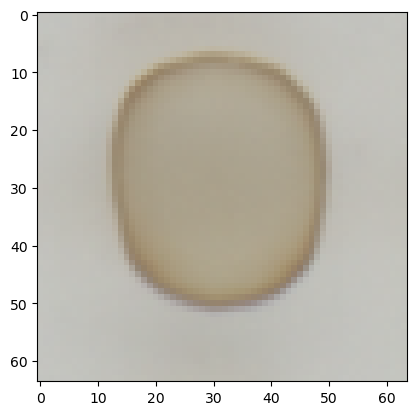

In [121]:
import matplotlib.pyplot as plt
plt.imshow(image_data)
plt.show()

## Explanation of Using `__array__()` with HDF5 Files in Python

When reading data from an HDF5 file using the `h5py` library in Python, you may encounter an error that looks something like this:


This error occurs when the HDF5 dataset contains objects that cannot be directly converted to an HDF5 datatype. One solution to this error is to read the data into memory and convert it to a NumPy array using the `__array__()` method.

When you call the `__array__()` method on a dataset in an HDF5 file, it converts the dataset into a NumPy array that can be stored in memory. This allows you to manipulate the data using NumPy functions and avoids issues with object datatypes.

However, it's important to note that reading large datasets into memory can be memory-intensive, especially if the dataset is very large. This means that it may not be practical to read in all of the data at once, and you may need to read the data in chunks or use other memory-saving techniques to avoid running out of memory.

In summary, using the `__array__()` method can be a useful way to convert HDF5 datasets to NumPy arrays for further manipulation, but it's important to be aware of the memory requirements and use appropriate techniques to manage memory when working with large datasets.


Text(0, 0.5, 'Absorption [a.U.]')

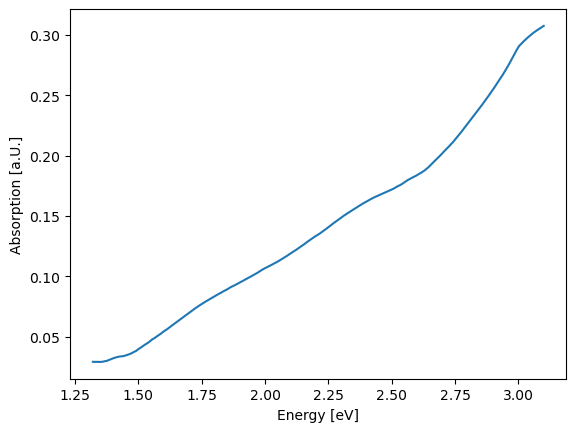

In [122]:
# Get the spectrum for the randomly-selected index
spectrum_data = materials_icp['spectra'][index].__array__()
eV = materials_icp['energy_eV'].__array__()

plt.plot(eV,spectrum_data)
plt.xlabel('Energy [eV]')
plt.ylabel('Absorption [a.U.]')

In [123]:
# Get the atomic fraction data and keys from the materials_icp dictionary
atfrac = materials_icp['atfrac'].__array__().T
atfrac_keys = materials_icp['atfrac_keys'][:]

# Find the indices of the non-zero entries in the atomic fractions at the selected index
nonzero_indices = atfrac[index].nonzero()[0]

# Initialize the shorthand string
shorthand = ''

# Loop over the non-zero indices in the atomic fractions at the selected index
for idx in nonzero_indices:
    # Get the element symbol and amount for the current index
    el = str(atfrac_keys[idx].decode('utf-8')).split('.PM')[0]
    amnt = atfrac[index][idx]
    # Add the element symbol and amount to the shorthand string
    shorthand += el+f'_{amnt:.2f}'


In [124]:
print('the material shown is a metal oxide witht he following composition:'+ shorthand+ 'Ox')

the material shown is a metal oxide witht he following composition:Bi_0.05V_0.60Mn_0.30La_0.05Ox


# Let's download catalyst data

The JCAP (Joint Center for Artificial Photosynthesis) at Caltech has collected a high-throughput dataset containing composition data and corresponding overpotentials required for oxygen evolution reaction (OER) measurements. The dataset was obtained using combinatorial synthesis, and contains information on thousands of samples with various compositions. For each composition, researchers measured the overpotential vs. OER necessary to generate 10mAh/cm2. The dataset was aquired as part of https://doi.org/10.1039/C9SC05999G 

The measurements were conducted using chronoamperometric techniques, also known as chronoamperometry or chronoamperometric measurements. This technique involves applying a constant potential to an electrode and monitoring the resulting current as a function of time. By analyzing the resulting current versus time curves, researchers can extract information about the electrocatalytic activity of the electrode, such as the overpotential required for a given reaction rate.

In the context of electrocatalysis, an overpotential represents the difference between the measured potential and the thermodynamic potential required to drive a particular reaction. The overpotential is typically a measure of the effectiveness of an electrocatalyst, with lower overpotentials indicating more efficient catalysis. Therefore, the JCAP high-throughput dataset provides valuable information for researchers looking to identify and optimize effective electrocatalysts for various applications.

In [125]:
import os
import urllib.request
import pickle

# Check if the file has already been downloaded
if not os.path.isfile('tri_data_share.pck'):
    # If the file hasn't been downloaded, download it
    url = 'https://github.com/SantoshSuram-TRI/ACE-I/raw/master/tri_data_share.pck'
    urllib.request.urlretrieve(url, 'tri_data_share.pck')

# Load the data from the downloaded file into a variable called 'materials_OER'
with open('tri_data_share.pck', 'rb') as f:
    materials_OER = pickle.load(f)

ok we need to have some additional information on the dataset. The data was aquired on a number of libraries where the plate ID's had the following composition:

| Plate ID | Label | Composition system |
|---------|-------|--------------------|
| 3496 | A | Mn–Fe–Co–Ni–La–Ce |
| 3851 | B | Mn–Fe–Co–Ni–Cu–Ta |
| 3860 | C | Mn–Fe–Co–Cu–Sn–Ta |
| 4098 | D | Ca–Mn–Co–Ni–Sn–Sb |

Again we need to turn these lists into compositional strings like such:

In [126]:
# Define the plate ID
plate_id = '3496'

# Get the keys in the materials_OER dictionary for the specified plate ID
materials_OER[plate_id].keys()

# Get the OER overpotential and composition data for the specified plate ID
OER_overpotential = materials_OER[plate_id]['fom']
composition_OER = materials_OER[plate_id]['comp']

# Define the keys for the atomic fractions in the materials_OER dictionary
atfrac_keys_OER = 'Mn-Fe-Co-Ni-La-Ce'

# Select a random index in the composition data
index = np.random.randint(len(OER_overpotential))

# Find the indices of the non-zero entries in the composition at the selected index
nonzero_indices = composition_OER[index].nonzero()[0]

# Split the atfrac keys string into individual element symbols
atfrac_keys_OER_split = atfrac_keys_OER.split('-')

# Initialize the shorthand string
shorthand = ''

# Loop over the non-zero indices in the composition at the selected index
for idx in nonzero_indices:
    # Get the element symbol and amount for the current index
    el = atfrac_keys_OER_split[idx]
    amnt = composition_OER[index][idx]
    # Add the element symbol and amount to the shorthand string
    shorthand += el+f'_{amnt:.1f}'


In [129]:
print(shorthand)
print('Overpotential: '+ str(OER_overpotential[index]) + ' V vs. OER @ 10 mA/cm2')

Co_0.3Ni_0.6Ce_0.1
Overpotential: 0.635603 V vs. OER @ 10 mA/cm2


# A X-ray diffraction dataset

Phase region analysis is an important tool for materials scientists and researchers seeking to discover new materials with desirable properties. Phase regions describe the extend of chemical compositions in a system which exhibit desireable materials properties, and understanding the extend and innner and intra region functional property changes of these phase regions can help researchers identify new materials with new and improved properties. However, accurately mapping the phase regions for a given set of elements can be a challenging and time-consuming task, especially for complex ternary or higher-dimensional systems.

The phase region analysis can be very complicated and the data aquisition even more so. This is why in:

Le Bras, R., Bernstein, R., Gregoire, J. M., Suram, S. K., Gomes, C. P., Selman, B., & van Dover, R. B. (2014). 
    A Computational Challenge Problem in Materials Discovery: Synthetic Problem Generator and Real-World Datasets. 
    In Twenty-Eighth International Conference on Artificial Intelligence (AAAI'14).
    
The scientists have come up with a synthetic dataset generator that allows us to test our algorithms in a "safe" environment.

The data is available here: https://www.udiscover.it/downloads/materials/synthetic_instance_data.zip

In [150]:
import os
import urllib.request
import zipfile

# Define the URL for the zip file
url = 'https://www.udiscover.it/downloads/materials/synthetic_instance_data.zip'

# Define the local file name for the zip file
filename = 'synthetic_instance_data.zip'

# Check if the file has already been downloaded
if not os.path.isfile(filename):
    # Download the file
    urllib.request.urlretrieve(url, filename)

# Extract the contents of the zip file
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('.')

Ok now it gets a little complicated because we need to read in the data and it is not in the ... let say most simple format. see the following code as an exercise if you can read some wonky python code

In [173]:
with open("synthinst1_t0_n5_p100_s1_inst.txt", "r") as f:
    data = f.read()
intensities = []
lines = data.split("\n")
for line in lines:
    if line.startswith("I"):
        intens = [float(l) for l in line.split('=')[1].split(',')]
        intensities.append(intens)
    elif line.startswith("Q"):
        Qax = [float(l) for l in line.split('=')[1].split(',')]

y = np.array(intensities).T
x = Qax

Text(0, 0.5, 'Intensity')

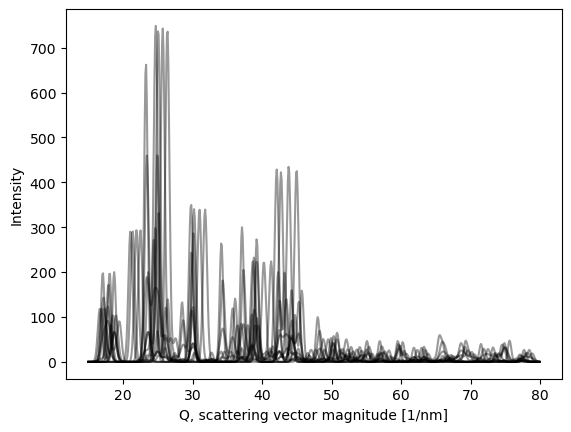

In [178]:
_ = plt.plot(x,y,color='black',alpha=0.4)
plt.xlabel('Q, scattering vector magnitude [1/nm]')
plt.ylabel('Intensity')


While we are at it let's download some experimental data as well

In [179]:
import os
import urllib.request
import zipfile

# Define the URL for the zip file
url = 'https://www.udiscover.it/downloads/materials/2016_suram_phase_mapping_vmnnbo_data.zip'

# Define the local file name for the zip file
filename = '2016_suram_phase_mapping_vmnnbo_data.zip'

# Check if the file has already been downloaded
if not os.path.isfile(filename):
    # Download the file
    urllib.request.urlretrieve(url, filename)

# Extract the contents of the zip file
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('.')

In [180]:
import numpy as np

with open("./data_Si/24297_NbMnVO_v02.txt", "r") as f:
    data = f.read()

intensities = []
Qax = []

lines = data.split("\n")

for line in lines:
    if line.startswith("I"):
        intens = [float(l) for l in line.split('=')[1].split(',')]
        intensities.append(intens)
    elif line.startswith("Q"):
        Qax = [float(l) for l in line.split('=')[1].split(',')]

y = np.array(intensities).T
x = Qax


Text(0, 0.5, 'Intensity')

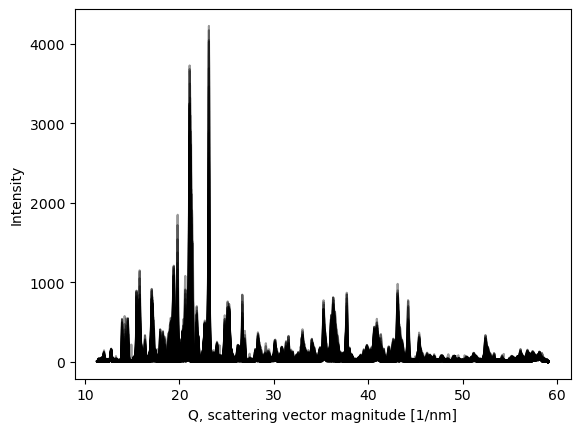

In [181]:
_ = plt.plot(x,y,color='black',alpha=0.4)
plt.xlabel('Q, scattering vector magnitude [1/nm]')
plt.ylabel('Intensity')

Ok that looks much more complex doesn't it? Now we can go for the secnd to last dataset from battery cycling!

# Time series data - battery cycling!

Time series data is a critical data type that is increasingly encountered in many fields. It is especially important in machine learning since many real-world systems generate data that evolves over time. Battery cycling is one such example where a battery is repeatedly charged and discharged, and the performance of the battery changes with each cycle. The data generated from battery cycling experiments is time series data, which means it includes a sequence of observations taken at a specific time interval. The ability to analyze and model this type of data can provide significant insights into the behavior and performance of the battery over time.

Machine learning models designed for time series data are essential for predictive maintenance, process optimization, and anomaly detection. They can help identify patterns and trends in the data that may not be easily observable in simple visualizations or statistical analyses. Moreover, these models can also learn from past experiences to predict the future behavior of the system accurately. However, dealing with time series data is often challenging because of its sequential and temporal nature. As a result, it requires specialized techniques and models that can handle the time dependencies in the data. In conclusion, understanding how to deal with time series data is becoming increasingly crucial for machine learning practitioners to unlock its full potential in various fields, including energy storage, finance, healthcare, and many others.

In [183]:
#because I felt fancy here is a download with a progress bar:

import os
import requests
from tqdm import tqdm

# Set the URL for the file
url = 'https://zenodo.org/record/7299473/files/AutoBassPapercells.hdf5'

# Set the filename to save the file as
filename = 'AutoBassPapercells.hdf5'

# Check if file exists before downloading
if os.path.exists(filename):
    print("File already exists")
else:
    # Start the download
    with requests.get(url, stream=True) as r:
        # Set the chunk size for downloading
        chunk_size = 1024
        
        # Get the file size in bytes
        total_size = int(r.headers.get('content-length', 0))
        
        # Initialize the progress bar
        progress = tqdm(total=total_size, unit='iB', unit_scale=True)

        # Open the file and start writing the downloaded content
        with open(filename, 'wb') as f:
            for chunk in r.iter_content(chunk_size=chunk_size):
                # Update the progress bar
                progress.update(len(chunk))
                
                # Write the downloaded chunk to the file
                f.write(chunk)

        # Close the progress bar
        progress.close()
        
        # Print a message indicating that the download is complete
        print('Download complete')


100%|████████████████████████████████████████████████████████████████████████████| 1.45G/1.45G [07:58<00:00, 3.04MiB/s]

Download complete


Ok now let's open this file

In [184]:
batteries = h5py.File(filename, 'r')

Ok what does this dataset entail?

- `Current(A)`: The current in Amperes (A) flowing through the battery.
- `Cycle_Index`: The index of the cycling cycle.
- `Step_Index`: The index of the step within the current cycle.
- `Testtime(s)`: The time in seconds (s) that the battery has been cycling for.
- `Voltage(V)`: The voltage in Volts (V) of the battery.
- `charge_Energy(Wh)`: The energy in Watt-hours (Wh) that the battery has received during charging.
- `discharge_Energy(Wh)`: The energy in Watt-hours (Wh) that the battery has released during discharging.


In [207]:
#let's look at it
t = batteries['cell_42']['raw']['Testtime(s)'].__array__()
V = batteries['cell_42']['raw']['Voltage(V)'].__array__()
I = batteries['cell_42']['raw']['Current(A)'].__array__()

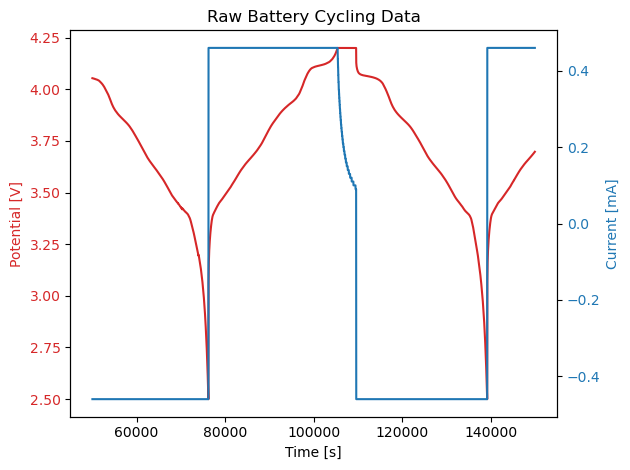

In [208]:
import matplotlib.pyplot as plt

start, end = 5000, 15000

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Potential [V]', color=color)
ax1.plot(t[start:end], V[start:end], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Current [mA]', color=color)
ax2.plot(t[start:end], I[start:end]*1000, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Raw Battery Cycling Data')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

Now I understand that this might be a little cumbersome to work with because very often you need data from idividual cycles. Here is how you can do the same plot for cycle 123. Be aware that here the keys changed slightly!

In [218]:
#the split data contains both the charge and discharge
cycle = 123
cell = 42

t = batteries['cell_'+str(cell)]['split']['Cycle_'+str(cycle)]['t'].__array__()
V = batteries['cell_'+str(cell)]['split']['Cycle_'+str(cycle)]['V'].__array__()
I = batteries['cell_'+str(cell)]['split']['Cycle_'+str(cycle)]['I'].__array__()

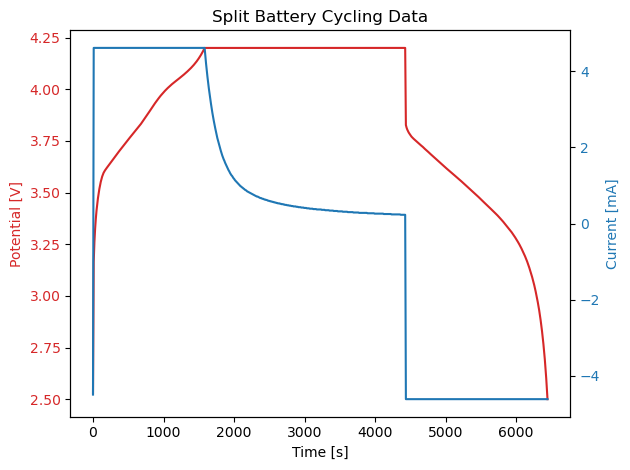

In [219]:

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Potential [V]', color=color)
ax1.plot(t, V, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Current [mA]', color=color)
ax2.plot(t, I*1000, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Split Battery Cycling Data')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

# Final dataset: Molecules and melting point

SMILES (Simplified Molecular Input Line Entry System) is a string representation of a chemical structure that can be read by both humans and machines. SMILES strings use a series of symbols to represent the atoms, bonds, and functional groups of a molecule.

Molecules can be represented in many ways, but SMILES strings are particularly useful because they are simple and can be easily parsed by computers. They can be used for a variety of applications, including searching large databases of chemical structures, comparing molecular structures, and predicting properties of molecules.

One example of how SMILES strings can be used in machine learning is in predicting melting points. By using molecular fingerprints derived from SMILES strings, we can train a machine learning model to predict the melting point of a molecule based on its structure. This is a neat example of the intersection of chemistry and machine learning, and it can have practical applications in drug discovery and materials science.

In [227]:
import os
import pandas as pd
import urllib.request

url = 'https://raw.githubusercontent.com/flawnson/Melting_point_predictor_NN_Regression/master/BradleyMeltingPointDatasetClean.csv'

molecules = pd.read_csv(url,index_col=0,parse_dates=[0])

In [231]:
molecules.columns

Index(['smiles', 'mpC', 'csid', 'link', 'source'], dtype='object')

Usefull for later we can easily generate Morgan Fingerprints. This is not reccomended but a dirty fix since some smiles are broken in this record

In [233]:
from rdkit import Chem
from rdkit.Chem import AllChem

# Create a list to hold the fingerprints
fingerprints = []
melting_points = []

# Iterate over the 'smiles' column in the dataframe
for smi,melt in zip(molecules['smiles'],molecules['mpC']):
    try:
        # Convert the SMILES string to a molecule object
        mol = Chem.MolFromSmiles(smi)
        # Generate the fingerprint for the molecule
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=64)
        # Append the fingerprint to the list
        fingerprints.append(fp)
        melting_points.append(melt)
    except:
        pass
        


[14:40:51] Explicit valence for atom # 20 C, 5, is greater than permitted
[14:40:51] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20 21 22 23 24
[14:40:51] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14 15 16 17 23
[14:40:51] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6
[14:40:51] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[14:40:51] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[14:40:51] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9
[14:40:51] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[14:40:51] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[14:40:51] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[14:40:51] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4
[14:40:51] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8
[14:40:51] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8
[14:40:51] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 8 9 10 11 12 13 14
[14:40:51] Can't kekulize mol.  Unkeku

Text(0, 0.5, 'Frequency')

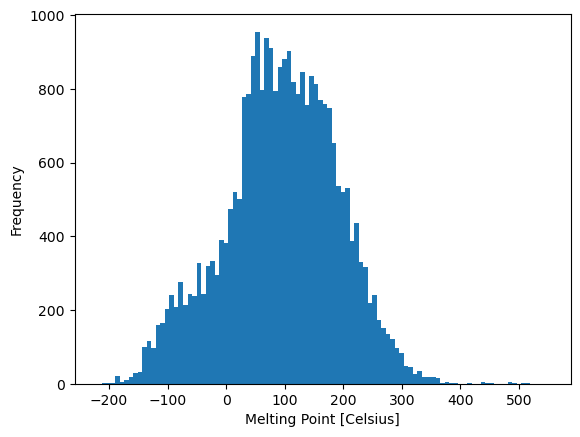

In [235]:
#let's at least have a look at the melting point distribution
plt.hist(melting_points,100,range=(-220,550))
plt.xlabel('Melting Point [Celsius]')
plt.ylabel('Frequency')